#Exercise
This is a dataset related to how much money a person can get from a mortgage on his or her home. This dataset includes the following features:
* Gender: Gender of the borrower (including two values 'F' and 'M')
* Age: Age of the customer applying for a loan (including positive integer values)
* Income (USD): Customer's income in USD (value is a positive number)
* Income Stability: The level of customer's income stability (including three values of Low and High)
* Property Age: Life expectancy of the house in days (including positive integer values)
* Property Location: Location of the house (including 'Rural', 'Urban', and 'Semi-Urban')
* Property Price: The value of the house in USD (including positive real values)
* Loan Sanction Amount (USD): Amount that customers can borrow in USD (target value)

Based on practice sample #1, proceed:
1. Read data
2. Visualize some information of data
3. Normalize Data to train linear regression model
4. Train linear regression model and show the model's intercepts, coeficients
5. Learn on sklearn how to use Ridge, Lasso, and ElasticNet compare the error of all 3 algorithms with Linear Regression (https://scikit-learn.org/stable/index.html)
6. Let's try Polynomial of order 2 to compare the previous results. What will the result be if we choose the n order too high?


In [ ]:
# mount data from google drive to colab
from google.colab import drive
drive.mount('/content/drive')

#import library
import pandas as pd # pandas 
import numpy as np # numpy

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#1.Read Data

In [ ]:
# read data using Pandas DataFrame
data = pd.read_csv("/content/drive/MyDrive/NMMH/Week 01/final_house_loan.csv")
data.head()

,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
0,F,19,1641.25,Low,1651.25,Rural,59641.82,21026.420753
1,M,29,1989.71,Low,1990.71,Urban,179858.51,60595.183366
2,F,37,1849.91,Low,1856.91,Rural,117297.62,39181.648002
3,M,65,2735.18,High,2747.18,Rural,354417.72,128497.710865
4,F,62,4741.78,High,4740.78,Urban,82049.80,39386.919336


#2.Visualize some information of data

In [ ]:
data.describe()

,Age,Income (USD),Property Age,Property Price,Loan Sanction Amount (USD)
count,47297.000000,47265.000000,47263.000000,4.729700e+04,47297.000000
mean,40.000063,2586.684384,2586.611058,1.350880e+05,46487.229765
std,16.086128,1558.768809,1558.842286,9.457875e+04,32549.905634
min,18.000000,372.700000,370.700000,7.859620e+03,254.586578
25%,24.000000,1653.740000,1652.820000,6.250408e+04,21782.822159
50%,40.000000,2245.480000,2244.810000,1.130936e+05,38822.132402
75%,55.000000,3128.560000,3128.380000,1.819546e+05,62612.236905
max,65.000000,54662.750000,54647.750000,1.077967e+06,366131.165218


<Axes: xlabel='Loan Sanction Amount (USD)', ylabel='Count'>

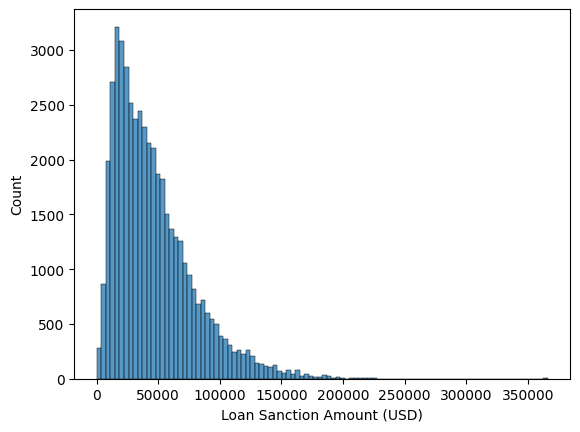

In [ ]:
import seaborn as sns
sns.histplot(x="Loan Sanction Amount (USD)", data=data, bins=100)

In [ ]:
# Null checking
data.isnull().sum()

Gender                         0
Age                            0
Income (USD)                  32
Income Stability              12
Property Age                  34
Property Location              3
Property Price                 0
Loan Sanction Amount (USD)     0
dtype: int64

In [ ]:
print("Sample size:", len(data))
data = data.dropna()
print("Not null sample size:", len(data))

Sample size: 47297
Not null sample size: 47251


#3.Normalize Data to train linear regression model

In [ ]:
# data normalization
normalized_data = data.copy()
normalized_data["Gender"] = normalized_data["Gender"].apply(lambda x: 0 if x=="F" else 1)
normalized_data["Income Stability"] = normalized_data["Income Stability"].apply(lambda x: 0 if x=="High" else 1)
normalized_data["Property Location"] = normalized_data["Property Location"].apply(lambda x: 0 if x=="Urban" else 1  )
normalized_data

,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
0,0,19,1641.25,1,1651.25,1,59641.82,21026.420753
1,1,29,1989.71,1,1990.71,0,179858.51,60595.183366
2,0,37,1849.91,1,1856.91,1,117297.62,39181.648002
3,1,65,2735.18,0,2747.18,1,354417.72,128497.710865
4,0,62,4741.78,0,4740.78,0,82049.80,39386.919336
...,...,...,...,...,...,...,...,...
47292,0,62,2121.48,1,2135.48,1,240291.63,78800.491330
47293,1,38,1506.72,1,1505.72,1,218431.37,72483.293359
47294,0,20,1595.10,1,1582.10,1,154458.88,52462.861498
47295,0,50,2002.27,1,2007.27,1,72277.78,22909.596763


In [ ]:
# Correlation
normalized_data.corr()

,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
Gender,1.000000,0.007706,-0.002445,-0.019000,-0.002512,-0.006825,0.005931,0.003396
Age,0.007706,1.000000,-0.044086,-0.455855,-0.044085,0.012587,-0.003274,-0.000115
Income (USD),-0.002445,-0.044086,1.000000,0.080961,0.999986,0.002635,0.358110,0.392897
Income Stability,-0.019000,-0.455855,0.080961,1.000000,0.081008,-0.002504,0.004813,-0.070969
Property Age,-0.002512,-0.044085,0.999986,0.081008,1.000000,0.002670,0.358110,0.392892
Property Location,-0.006825,0.012587,0.002635,-0.002504,0.002670,1.000000,0.000443,0.000103
Property Price,0.005931,-0.003274,0.358110,0.004813,0.358110,0.000443,1.000000,0.994429
Loan Sanction Amount (USD),0.003396,-0.000115,0.392897,-0.070969,0.392892,0.000103,0.994429,1.000000


<Axes: >

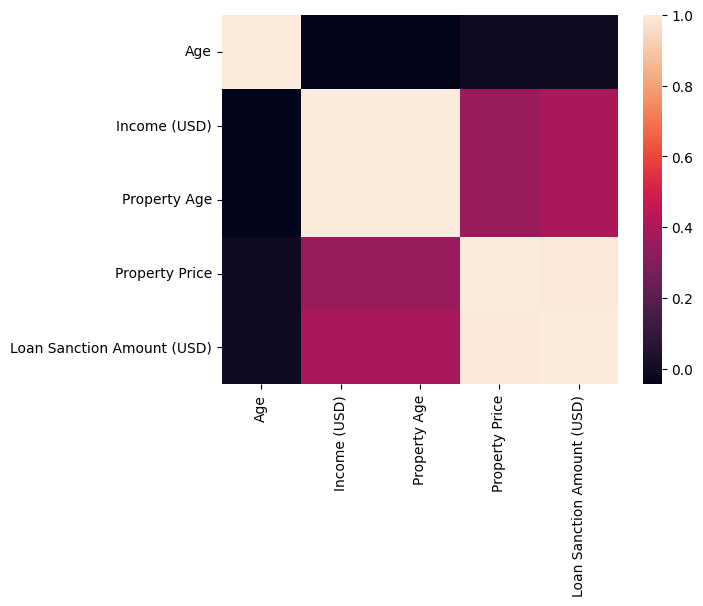

In [ ]:
# Heatmap
import seaborn as sns
sns.heatmap(data.corr())

#4.Train linear regression model and show the model's intercepts, coeficients

In [ ]:
# Split X, y from dataset
columns = normalized_data.columns.tolist()             # Columns name
columns.remove('Loan Sanction Amount (USD)')           # Remove y label (column charges in this case)
feature_data = normalized_data[columns]                          # X 
target_data = normalized_data["Loan Sanction Amount (USD)"]      # y

In [ ]:
from sklearn.model_selection import train_test_split
trainX, testX ,trainY, testY = train_test_split(feature_data, target_data, train_size=0.70, random_state=18)
print('Training:' + str(trainX.shape))
print('Test:' + str(testX.shape))

Training:(33075, 7)
Test:(14176, 7)


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)    

In [ ]:
model.fit(trainX, trainY)

LinearRegression()

In [ ]:
print(model.coef_ ) # print coefficient
print()
print(model.intercept_) # print intercept_

[-2.61831120e+02 -7.90532732e+01  5.48968559e-01 -1.11383511e+04
  4.77714529e-01 -1.75506062e+01  3.36166754e-01]

11860.260731006623


In [ ]:
from sklearn.metrics import mean_absolute_error
pred = model.predict(testX) # Predict for the test set
mean_absolute_error(y_pred=pred, y_true=testY) # Calculate mae between test set and prediction

170.1293546246066

#5.Learn on sklearn how to use Ridge, Lasso, and ElasticNet compare the error of all 3 algorithms with Linear Regression

**Lasso**

In [ ]:
# Lasso
from sklearn import linear_model
clf = linear_model.Lasso(alpha=1,fit_intercept=True)

In [ ]:
clf.fit(trainX, trainY)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.483e+10, tolerance: 3.493e+09
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=1)

In [ ]:
print(clf.coef_ ) # print coefficient
print()
print(clf.intercept_) # print intercept_

[-2.57708012e+02 -7.89228392e+01  8.45825089e-01 -1.11225085e+04
  1.80656690e-01 -1.29303305e+01  3.36167914e-01]

11835.751958927249


In [ ]:
from sklearn.metrics import mean_absolute_error
pred = clf.predict(testX) # Predict for the test set
mean_absolute_error(y_pred=pred, y_true=testY) # Calculate mae between test set and prediction

169.56693072864516

**Rigde**

In [ ]:
from sklearn.linear_model import Ridge
import numpy as np
clf1 = Ridge(alpha=1.0,fit_intercept=True)

In [ ]:
clf1.fit(trainX, trainY)

Ridge()

In [ ]:
print(clf1.coef_ ) # print coefficient
print()
print(clf1.intercept_) # print intercept_

[-2.61763511e+02 -7.90108194e+01  5.50781757e-01 -1.11331157e+04
  4.75832735e-01 -1.75651489e+01  3.36167088e-01]

11853.907009300005


In [ ]:
from sklearn.metrics import mean_absolute_error
pred = clf1.predict(testX) # Predict for the test set
mean_absolute_error(y_pred=pred, y_true=testY) # Calculate mae between test set and prediction

170.2219508057068

**ElasticNet**

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression

In [ ]:
regr = ElasticNet(alpha=1.0,fit_intercept=True)

In [ ]:
regr.fit(trainX, trainY)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.548e+11, tolerance: 3.493e+09
  model = cd_fast.enet_coordinate_descent(


ElasticNet()

In [ ]:
print(regr.coef_ ) # print coefficient
print()
print(regr.intercept_) # print intercept_

[-6.38188426e+01  9.31559457e-01  9.59398777e-01 -1.26819889e+03
 -6.22031951e-02 -1.39973588e+01  3.36795460e-01]

-172.0292804414421


In [ ]:
from sklearn.metrics import mean_absolute_error
pred = regr.predict(testX) # Predict for the test set
mean_absolute_error(y_pred=pred, y_true=testY) # Calculate mae between test set and prediction

1739.6784358613672

#6.Let's try Polynomial of order 2 to compare the previous results. What will the result be if we choose the n order too high?

**LinearRegression**

In [ ]:
#Linear Regression with Polynomial Transform
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(2, include_bias=False), LinearRegression()) # should use include_bias=false b/c bias is included in LinearRegression() 
poly_model.fit(trainX, trainY)  
pred = poly_model.predict(testX)
mean_absolute_error(y_pred=pred, y_true=testY) 

179.76823727230888

**Lasso**

In [ ]:
#Linear Regression with Polynomial Transform
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
poly_model1 = make_pipeline(PolynomialFeatures(2, include_bias=False),linear_model.Lasso()) # should use include_bias=false b/c bias is included in LinearRegression() 
poly_model1.fit(trainX, trainY)  
pred = poly_model1.predict(testX)
mean_absolute_error(y_pred=pred, y_true=testY) 

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.870e+10, tolerance: 3.493e+09
  model = cd_fast.enet_coordinate_descent(


181.75931345376264

**Ridge**

In [ ]:
#Linear Regression with Polynomial Transform
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
poly_model2 = make_pipeline(PolynomialFeatures(2, include_bias=False),Ridge()) # should use include_bias=false b/c bias is included in LinearRegression() 
poly_model2.fit(trainX, trainY)  
pred = poly_model2.predict(testX)
mean_absolute_error(y_pred=pred, y_true=testY) 

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.68647e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


180.80320862122554

**ElasticNet**

In [ ]:
#Linear Regression with Polynomial Transform
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
poly_model3 = make_pipeline(PolynomialFeatures(2, include_bias=False),ElasticNet()) # should use include_bias=false b/c bias is included in LinearRegression() 
poly_model3.fit(trainX, trainY)  
pred = poly_model3.predict(testX)
mean_absolute_error(y_pred=pred, y_true=testY) 

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.901e+10, tolerance: 3.493e+09
  model = cd_fast.enet_coordinate_descent(


191.87410851036014

Khi chúng ta sử dụng PolynomialFeatures với mức độ cao, nó có thể dẫn đến việc mô hình bị khớp quá mức. Điều này có nghĩa là mô hình trở nên quá phức tạp và bắt đầu điều chỉnh nhiễu trong dữ liệu thay vì mẫu bên dưới. Do đó, mô hình hoạt động tốt trên dữ liệu huấn luyện nhưng không khái quát hóa tốt đối với dữ liệu mới, chưa nhìn thấy. Ngoài ra, các tính năng đa thức bậc cao có thể làm tăng độ phức tạp tính toán của mô hình, khiến việc đào tạo và dự đoán trên dữ liệu mới chậm hơn. Do đó, điều quan trọng là chọn mức độ phù hợp của các tính năng đa thức dựa trên độ phức tạp của dữ liệu và hiệu suất của mô hình. Các kỹ thuật chính quy hóa như hồi quy Ridge hoặc Lasso cũng có thể được sử dụng để ngăn chặn quá mức khi sử dụng các tính năng đa thức bậc cao.